In [615]:
# librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [616]:
# leer el data set
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [617]:
df0['invoice_no'].nunique()

99457

In [618]:
df0['customer_id'].nunique()

99457

In [619]:
# forma del df
print(df0.shape)

(99457, 10)


In [620]:
# informacion general del df
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [621]:
# valores unicos del atributo
print('Valores unicos en payment_method:', df0['payment_method'].unique())

# numero de valores diferentes del atributo
print('Numero de valores unicos:', df0['payment_method'].nunique())

Valores unicos en payment_method: ['Credit Card' 'Debit Card' 'Cash']
Numero de valores unicos: 3


In [622]:
# valores unicos del atributo
print('Valores unicos en gender:', df0['gender'].unique())

Valores unicos en gender: ['Female' 'Male']


In [623]:
# Copia del df antes de modificar los datos
df1 = df0.copy()

In [624]:
# Convertir el 'invoice data' en fecha
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], dayfirst=True)

In [625]:
print(df1['invoice_date'].head(3))

0   2022-08-05
1   2021-12-12
2   2021-11-09
Name: invoice_date, dtype: datetime64[ns]


In [626]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [627]:
# agregar columnas para años
df1['year'] = df1['invoice_date'].dt.strftime('%Y')

In [628]:
# agregar columnas para meses
df1['month'] = df1['invoice_date'].dt.month

In [629]:
df1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11


In [630]:
# nombre de los atributos del df
columns_name = df1.columns.to_list()
print(columns_name)

['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall', 'year', 'month']


In [631]:
columns_name2 = ['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'year', 'month', 'shopping_mall']

In [632]:
# df1 con los atributos ordenados
df1_2 = df1[columns_name2]

In [633]:
df1_2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul


### .1 Como es la relacion de género y número de transacciones

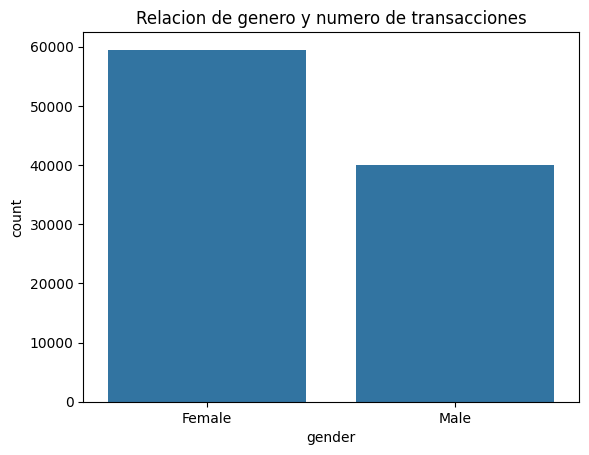

In [634]:
# Histograma: cantidad de hombres y mujeres
sns.countplot(data=df1, x='gender').set(title='Relacion de genero y numero de transacciones');

In [635]:
# .value_counts() cantidad de elementos por categoria
gender_quantity = df1['gender'].value_counts()
gender_quantity

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [636]:
# resetear el indice y trabajar con un df
df_gender = df1['gender'].value_counts().reset_index()
df_gender.shape

(2, 2)

In [637]:
df_gender

,gender,count
0,Female,59482
1,Male,39975


Text(0.5, 1.0, 'Relacion de transacciones entre mujeres y hombres')

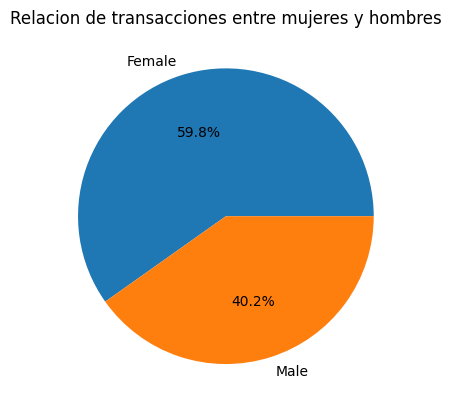

In [638]:
plt.pie(gender_quantity, labels=gender_quantity.index, autopct='%1.1f%%')
plt.title('Relacion de transacciones entre mujeres y hombres')

### .2 Como es la distribución de edades por número de transacciones

In [639]:
df2 = df1_2.copy()

In [640]:
df2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul


In [641]:
df2['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [642]:
# nueva columna para categorias de edades
df2['age_cat'] = df2['age']

In [643]:

# Categoria de edades.Funcion para definir categorias de edad
# Gen Z: 18-24, Millenials: 25-34, Gen X: 35-49, Gen Boomers: 50-64, Gen S: 65 en adelante
def category_f(age):
    if (age >= 18) and (age < 24):
        return 'Gen Z'
    elif (age >= 25) and (age < 34):
        return 'Millenials'
    elif (age >= 35) and (age < 49):
        return 'Gen X'
    elif (age >= 50) and (age < 64):
        return 'Boomers'
    else: 
        return 'Gen S'

In [644]:
# Aplicamos la funcion 
df2['age_cat'] = df2['age_cat'].apply(category_f)

In [645]:
# Confirmamos que la funcion hace el trabajo
df2[['age', 'age_cat']].tail(5)

,age,age_cat
99452,45,Gen X
99453,27,Millenials
99454,63,Boomers
99455,56,Boomers
99456,36,Gen X


[Text(0.5, 1.0, 'Edades por transaccion')]

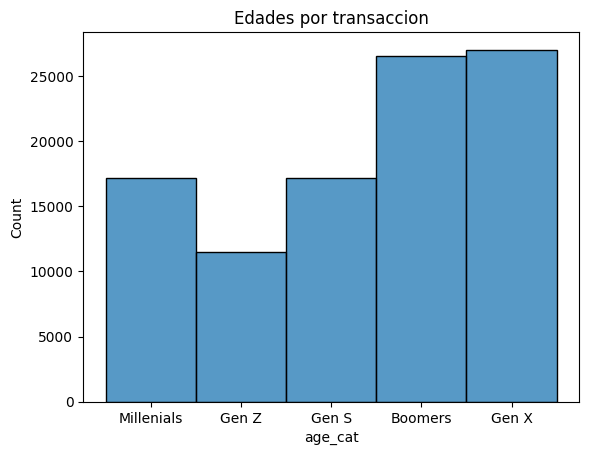

In [646]:
# Histograma
sns.histplot(data=df2, x='age_cat').set(title='Edades por transaccion')

In [647]:
df2.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,Gen Z


### .3 ¿Qué grupo de edad gastó más dinero?

In [648]:
# nueva
df3 = df2.copy()

In [649]:
df3['total'] = df3['quantity'] * df3['price']

In [650]:
df3[['total', 'quantity', 'price']].tail(3)

,total,quantity,price
99454,20.92,2,10.46
99455,16800.00,4,4200.00
99456,105.57,3,35.19


In [651]:
df_age_total = df3.groupby('age_cat')['total'].sum()
# df_age_total.dtype
df_age_total

age_cat
Boomers       66688766.34
Gen S         43720744.95
Gen X         69669729.80
Gen Z         28371673.97
Millenials    43054879.19
Name: total, dtype: float64

In [652]:
type(df_age_total)

pandas.core.series.Series

In [653]:
# Modificar el tipo de dato a un df
df_age_total2 = df3.groupby('age_cat')['total'].sum().sort_values(ascending=False).reset_index()
df_age_total2.head()

,age_cat,total
0,Gen X,69669729.80
1,Boomers,66688766.34
2,Gen S,43720744.95
3,Millenials,43054879.19
4,Gen Z,28371673.97


In [654]:
1e6

1000000.0

In [655]:
df_age_total2['total'] = round(df_age_total2['total'] / 1e6, 2)

In [656]:
df_age_total2.head()

,age_cat,total
0,Gen X,69.67
1,Boomers,66.69
2,Gen S,43.72
3,Millenials,43.05
4,Gen Z,28.37


In [657]:
# df_age_total2.plot();

In [658]:
df_age_total2.head()

,age_cat,total
0,Gen X,69.67
1,Boomers,66.69
2,Gen S,43.72
3,Millenials,43.05
4,Gen Z,28.37


C:\Users\Desiree\AppData\Local\Temp\ipykernel_1628\1394496385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_age_total2, x='age_cat', y='total', palette='Paired').set(title='Dinero gastado en millones de $ por edad');


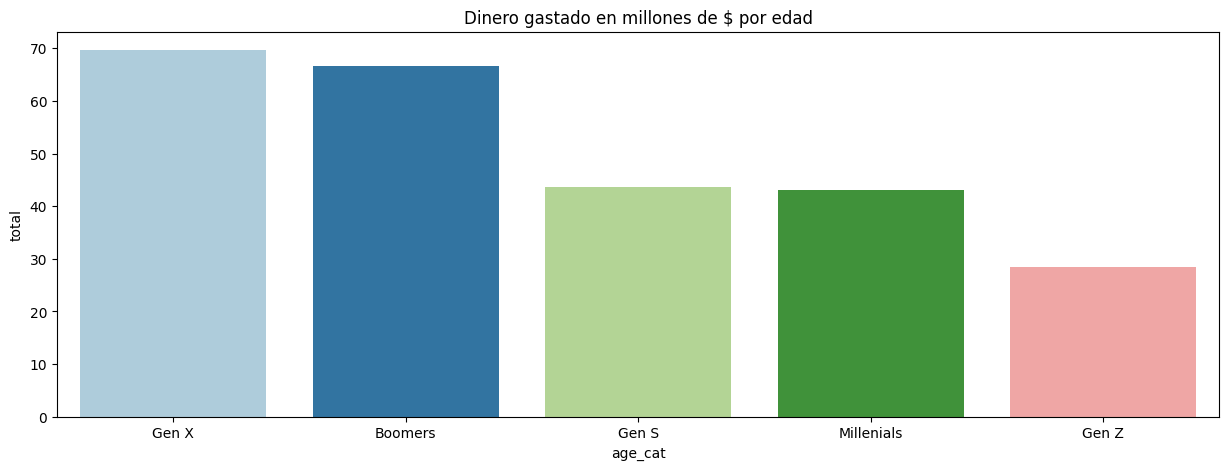

In [659]:
# Grafica por categoria de edad
plt.figure(figsize=(15,5))
sns.barplot(data=df_age_total2, x='age_cat', y='total', palette='Paired').set(title='Dinero gastado en millones de $ por edad');

In [660]:
#sns.histplot(data=df_age_total, x='age_cat').set(title='Gasto por edades')

In [661]:
# set index by total
df_age_total_i = df_age_total2.set_index('total')

In [662]:
df_age_total_i.head()

,age_cat
total,
69.67,Gen X
66.69,Boomers
43.72,Gen S
43.05,Millenials
28.37,Gen Z


### .4 Comprobar la distribución por edades entre hombres y mujeres

In [663]:
df4 = df3.copy()

In [664]:
# df4['total'] = round(df4['total']/1e3, 2)

In [665]:
df4.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,Gen S,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,Boomers,242.40


In [666]:
# Cantidad de transacciones por genero y categoria de edad
df_age_gender_quantity = df4.groupby(['gender', 'age_cat']).size().sort_values(ascending=False).reset_index(name='cantidad')
df_age_gender_quantity

,gender,age_cat,cantidad
0,Female,Gen X,16196
1,Female,Boomers,15887
2,Male,Gen X,10827
3,Male,Boomers,10658
4,Female,Millenials,10344
5,Female,Gen S,10272
6,Male,Gen S,6900
7,Male,Millenials,6854
8,Female,Gen Z,6783
9,Male,Gen Z,4736


In [667]:
# Total gastado por genero y categoria
df_age_gender_total = df4.groupby(['gender', 'age_cat'])['total'].sum().sort_values(ascending=False).reset_index()
df_age_gender_total.head(10)

,gender,age_cat,total
0,Female,Gen X,41310442.36
1,Female,Boomers,40002000.93
2,Male,Gen X,28359287.44
3,Male,Boomers,26686765.41
4,Female,Gen S,26033710.62
5,Female,Millenials,25693211.31
6,Male,Gen S,17687034.33
7,Male,Millenials,17361667.88
8,Female,Gen Z,17167770.80
9,Male,Gen Z,11203903.17


In [668]:
df_age_gender_total_f = df_age_gender_total[df_age_gender_total['gender'] == 'Female']
df_age_gender_total_f

,gender,age_cat,total
0,Female,Gen X,41310442.36
1,Female,Boomers,40002000.93
4,Female,Gen S,26033710.62
5,Female,Millenials,25693211.31
8,Female,Gen Z,17167770.80


In [669]:
df_age_gender_total_f['total'] = round(df_age_gender_total_f['total'] / 1e6, 2)
df_age_gender_total_f

C:\Users\Desiree\AppData\Local\Temp\ipykernel_1628\3326150265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_gender_total_f['total'] = round(df_age_gender_total_f['total'] / 1e6, 2)


,gender,age_cat,total
0,Female,Gen X,41.31
1,Female,Boomers,40.00
4,Female,Gen S,26.03
5,Female,Millenials,25.69
8,Female,Gen Z,17.17


C:\Users\Desiree\AppData\Local\Temp\ipykernel_1628\2248636545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_age_gender_total_f, x='age_cat', y='total', palette='Paired').set(title='Grafica de dinero gastado por categoria de edad, en el genero femenino')


[Text(0.5, 1.0, 'Grafica de dinero gastado por categoria de edad, en el genero femenino')]

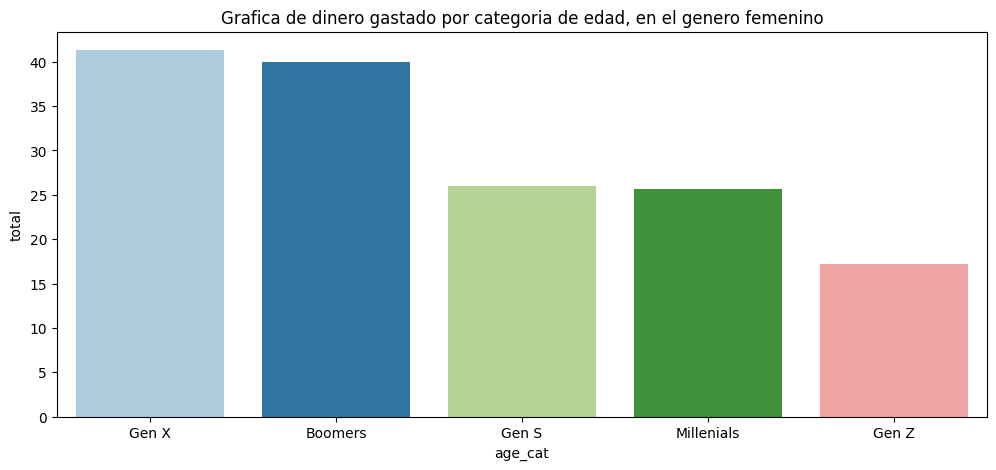

In [670]:
# Grafica de dinero gastado por categoria de edad, en el genero femenino
plt.figure(figsize=(12,5))
sns.barplot(data=df_age_gender_total_f, x='age_cat', y='total', palette='Paired').set(title='Grafica de dinero gastado por categoria de edad, en el genero femenino')

### .5 Forma de pago y número de transacciones

In [671]:
df0.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity


In [672]:
# Copia del df original
df5 = df0.copy()

In [673]:
# muestra los valores unicos del atributo
df5['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [674]:
# conteo de valores unicos del atributo
df5['payment_method'].nunique()

3

In [675]:
# conteo de valores por categoria
df5['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [676]:
df_methods = df5['payment_method'].value_counts().reset_index()
df_methods.head()

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


### .6 Relacion entre la cantidad de dinero gastada y el método de pago

In [677]:
df6 = df0.copy()

In [678]:
df6.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity


In [679]:
df6['total'] = df6['price'] * df6['quantity']

In [680]:
# df6.head(3)

In [681]:
df6.groupby('payment_method')['total'].sum().reset_index()

,payment_method,total
0,Cash,1.128322e+08
1,Credit Card,8.807712e+07
2,Debit Card,5.059643e+07


In [682]:
df_total_method = df6.groupby('payment_method')['total'].sum().reset_index()
df_total_method['total'] = df_total_method['total'] / 1e6
df_total_method.head()

,payment_method,total
0,Cash,112.832243
1,Credit Card,88.077124
2,Debit Card,50.596427


In [683]:
df_total_method['total'] = round(df_total_method['total'], 2)
df_total_method.head(3)

,payment_method,total
0,Cash,112.83
1,Credit Card,88.08
2,Debit Card,50.60


C:\Users\Desiree\AppData\Local\Temp\ipykernel_1628\750812250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[Text(0.5, 1.0, 'Dinero gastado por metodo de pago en MM')]

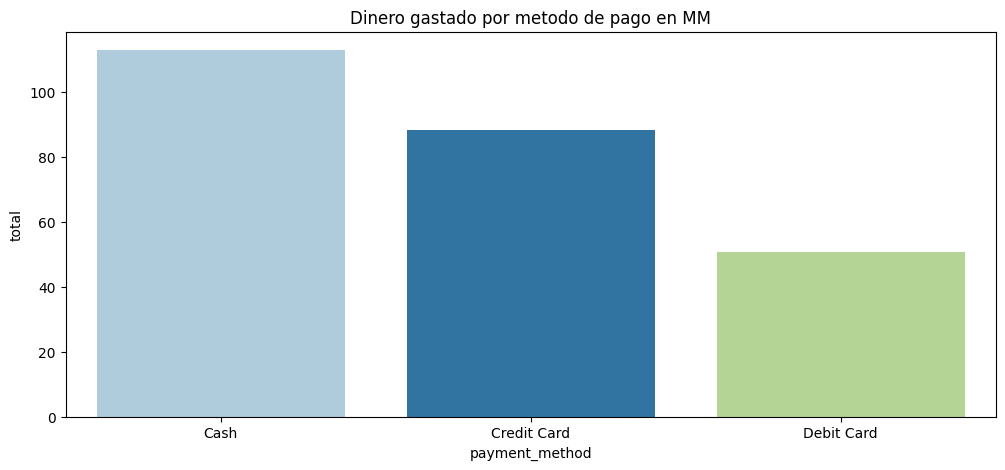

In [684]:
# Grafica de dinero gastado por metodo de pago en MM
plt.figure(figsize=(12,5))
sns.barplot(
    data=df_total_method, x='payment_method',
    y='total', palette='Paired'
).set(title='Dinero gastado por metodo de pago en MM')

### .7 Investigar qué precios de productos suelen preferir los clientes

In [685]:
df7 = df0.copy()

In [686]:
df7.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity


In [687]:
df7['price'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

<Axes: >

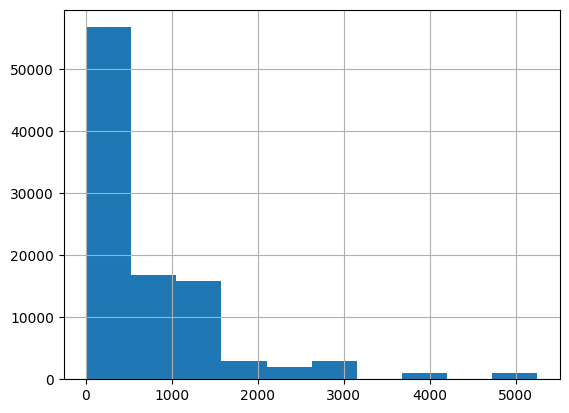

In [688]:
df7['price'].hist()

In [689]:
df7_1 = df2.copy()
df7_1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,Gen Z


In [690]:
df7_1.groupby(['age_cat', 'category'])['price'].value_counts(ascending=False).reset_index()

,age_cat,category,price,count
0,Boomers,Books,15.15,284
1,Boomers,Books,45.45,281
2,Boomers,Books,30.30,276
3,Boomers,Books,60.60,268
4,Boomers,Books,75.75,252
...,...,...,...,...
195,Millenials,Toys,107.52,375
196,Millenials,Toys,71.68,356
197,Millenials,Toys,35.84,350
198,Millenials,Toys,179.20,348


In [691]:
# df7_1.groupby('category')['price'].sum()

In [692]:
df7_1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,Gen Z


In [693]:
# Cantidad de transacciones por precio por categoria de producto.
df7_2 = df7_1.groupby('category')['price'].value_counts(ascending=False).reset_index()
df7_2.head(3)

,category,price,count
0,Books,75.75,1029
1,Books,30.30,1008
2,Books,45.45,1000


In [694]:
df7_2.groupby('category')['count'].max().reset_index()

,category,count
0,Books,1029
1,Clothing,6950
2,Cosmetics,3072
3,Food & Beverage,3002
4,Shoes,2045
5,Souvenir,1077
6,Technology,1009
7,Toys,2082


In [695]:
df7_2.groupby(['category', 'price'])['count'].max()

category         price  
Books            15.15       985
                 30.30      1008
                 45.45      1000
                 60.60       959
                 75.75      1029
Clothing         300.08     6841
                 600.16     6950
                 900.24     6907
                 1200.32    6849
                 1500.40    6940
Cosmetics        40.66      2986
                 81.32      2974
                 121.98     3072
                 162.64     3010
                 203.30     3055
Food & Beverage  5.23       3002
                 10.46      2909
                 15.69      2992
                 20.92      2884
                 26.15      2989
Shoes            600.17     1944
                 1200.34    2045
                 1800.51    2010
                 2400.68    2022
                 3000.85    2013
Souvenir         11.73      1024
                 23.46       984
                 35.19      1077
                 46.92       922
                 5

In [696]:
df7.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity


### .8 Descubre las categorías populares

In [697]:
df8 = df0.copy()

In [698]:
df8.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity


In [699]:
df8_1 = df8.groupby('category')['invoice_no'].count().reset_index()

df8_1.rename(columns=
             {'invoice_no':'invoice_quantity'},
             inplace=True
             )

df8_1.sort_values(by='invoice_quantity', ascending=False)

,category,invoice_quantity
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


In [700]:
df8_1['invoice_quantity'].sum()

99457

In [701]:
df8_2 = df8.groupby('category').size().reset_index(name='invoice_quantity')
df8_2.sort_values(by='invoice_quantity', ascending=False)

,category,invoice_quantity
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


### .9 Categorías populares por número de transacciones y monto total gastado

In [702]:
df3.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,Gen Z,300.08


In [703]:
df9 = df3.copy()

In [704]:
df9_11 = df9.groupby('category')['total'].sum().reset_index(
    name='total_mm')
df9_11['total_mm'] = round(df9_11['total_mm'] / 1e6, 2)
df9_11.sort_values(by='total_mm', ascending=False)

,category,total_mm
1,Clothing,114.00
4,Shoes,66.55
6,Technology,57.86
2,Cosmetics,6.79
7,Toys,3.98
3,Food & Beverage,0.85
0,Books,0.83
5,Souvenir,0.64


In [706]:
df9_1 = df9.groupby('category')['total'].sum().reset_index()
df9_1['total'] = round(df9_1['total'] / 1e6, 2)

df9_1.head()

,category,total
0,Books,0.83
1,Clothing,114.00
2,Cosmetics,6.79
3,Food & Beverage,0.85
4,Shoes,66.55


In [707]:
df9_1.rename(
    columns= 
    {'total': 'total_mm'}, inplace=True
)

df9_1.sort_values(by='total_mm', ascending=False)

,category,total_mm
1,Clothing,114.00
4,Shoes,66.55
6,Technology,57.86
2,Cosmetics,6.79
7,Toys,3.98
3,Food & Beverage,0.85
0,Books,0.83
5,Souvenir,0.64
